In [170]:
from google.cloud import bigquery
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [101]:
client = bigquery.Client()

In [102]:
query = """
SELECT *
FROM bigquery-public-data.thelook_ecommerce.order_items
WHERE FORMAT_DATE('%Y-%m', created_at) = '2025-06'
"""
order_df = client.query(query).to_dataframe()

In [103]:
order_df['created_at'].min(), order_df['created_at'].max()

(Timestamp('2025-06-01 00:00:59+0000', tz='UTC'),
 Timestamp('2025-06-30 23:59:39+0000', tz='UTC'))

In [104]:
order_df['delivered_at'].min(), order_df['delivered_at'].max()

(Timestamp('2025-05-29 18:29:00+0000', tz='UTC'),
 Timestamp('2025-07-08 08:40:00+0000', tz='UTC'))

In [105]:
order_df.head(2)

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,83423,57469,46209,14159,225145,Cancelled,2025-06-09 10:05:31+00:00,NaT,NaT,NaT,0.49
1,177565,122267,97924,28589,478804,Cancelled,2025-06-11 05:00:13+00:00,NaT,NaT,NaT,2.95


In [106]:
users_no = order_df['user_id'].unique().tolist()
# users_no

In [107]:
query = f"""
SELECT * 
FROM bigquery-public-data.thelook_ecommerce.users
WHERE id in {tuple(users_no)}
"""
user_data = client.query(query).to_dataframe()

In [108]:
user_data.isna().sum()

id                0
first_name        0
last_name         0
email             0
age               0
gender            0
state             0
street_address    0
postal_code       0
city              0
country           0
latitude          0
longitude         0
traffic_source    0
created_at        0
user_geom         0
dtype: int64

In [109]:
products_id = order_df['product_id'].unique().tolist()
query = f"""
SELECT *
FROM bigquery-public-data.thelook_ecommerce.products
WHERE id IN {tuple(products_id)}
"""
products_df = client.query(query).to_dataframe()

In [110]:
products_df.shape

(8117, 9)

In [142]:
dist_ids = products_df['distribution_center_id'].unique().tolist()
query = f"""
SELECT *
FROM bigquery-public-data.thelook_ecommerce.distribution_centers
WHERE id IN {tuple(dist_ids)}
"""
dist_centre_df = client.query(query).to_dataframe()

In [143]:
dist_centre_df.head(2)

,id,name,latitude,longitude,distribution_center_geom
0,10,Savannah GA,32.0167,-81.1167,POINT(-81.1167 32.0167)
1,4,Los Angeles CA,34.0500,-118.2500,POINT(-118.25 34.05)


In [113]:
products_df.head(2)

,id,cost,category,name,brand,retail_price,department,sku,distribution_center_id
0,14157,4.64877,Accessories,Enzyme Regular Solid Army Caps-Olive W35S45D (...,MG,10.99,Women,00BD13095D06C20B11A2993CA419D16B,1
1,14273,6.50793,Accessories,Washed Canvas Ivy Cap - Black W11S64C,MG,15.99,Women,F531DC20FDE20B7ADF3A73F52B71D0AF,1


In [114]:
user_data.head(2)

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at,user_geom
0,41589,Beth,Morgan,bethmorgan@example.com,48,F,Acre,4585 Neal Heights,69980-000,null,Brasil,-8.065346,-72.870949,Search,2024-02-04 04:00:00+00:00,POINT(-72.87094866 -8.065346116)
1,92485,Brandon,Randall,brandonrandall@example.com,28,M,Acre,326 David Dale Suite 544,69980-000,null,Brasil,-8.065346,-72.870949,Email,2020-11-04 17:11:00+00:00,POINT(-72.87094866 -8.065346116)


In [115]:
query = """
SELECT *
FROM bigquery-public-data.thelook_ecommerce.orders
WHERE FORMAT_DATE('%Y-%m', created_at) = '2025-06'
"""
orders = client.query(query).to_dataframe()

In [116]:
orders.shape

(6536, 9)

In [117]:
order_df.shape

(9535, 11)

In [118]:
orders.head(2)

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
0,13,12,Cancelled,F,2025-06-21 03:16:00+00:00,NaT,NaT,NaT,1
1,657,558,Cancelled,F,2025-06-15 01:48:00+00:00,NaT,NaT,NaT,1


In [119]:
order_df.head(2)

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,83423,57469,46209,14159,225145,Cancelled,2025-06-09 10:05:31+00:00,NaT,NaT,NaT,0.49
1,177565,122267,97924,28589,478804,Cancelled,2025-06-11 05:00:13+00:00,NaT,NaT,NaT,2.95


In [120]:
orders[orders['order_id'] == 657]

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
1,657,558,Cancelled,F,2025-06-15 01:48:00+00:00,NaT,NaT,NaT,1


In [121]:
order_df[order_df['order_id'] == 657]

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
362,915,657,558,5786,2468,Cancelled,2025-06-15 01:52:26+00:00,NaT,NaT,NaT,9.95


We will ignore the orders table records which does not have the product info. We can do nothing for them

In [135]:
# order_df['check_order_df'] = 1
# orders['check_orders'] = 1
final_order = order_df.merge(orders[['order_id', 'num_of_item']], 
                                  how='left', 
                                  on='order_id')

In [136]:
final_order

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,num_of_item
0,83423,57469,46209,14159,225145,Cancelled,2025-06-09 10:05:31+00:00,NaT,NaT,NaT,0.49,3
1,177565,122267,97924,28589,478804,Cancelled,2025-06-11 05:00:13+00:00,NaT,NaT,NaT,2.95,1
2,54103,37262,29843,9220,145953,Complete,2025-06-10 06:51:45+00:00,2025-06-12 04:36:00+00:00,2025-06-15 18:49:00+00:00,NaT,2.95,2
3,115413,79533,63765,13662,311380,Processing,2025-06-01 05:22:26+00:00,NaT,NaT,NaT,2.95,<NA>
4,101934,70273,56370,28921,274984,Returned,2025-06-26 14:57:28+00:00,2025-06-27 00:02:00+00:00,2025-06-30 09:58:00+00:00,2025-07-02 00:27:00+00:00,2.95,2
...,...,...,...,...,...,...,...,...,...,...,...,...
9530,95116,65570,52681,17094,256585,Cancelled,2025-06-14 11:14:02+00:00,NaT,NaT,NaT,903.00,2
9531,129792,89441,71702,22812,350204,Cancelled,2025-06-25 06:04:20+00:00,NaT,NaT,NaT,903.00,1
9532,134883,92930,74465,23648,364032,Cancelled,2025-06-26 07:18:40+00:00,NaT,NaT,NaT,903.00,1
9533,25942,17921,14415,22812,69857,Complete,2025-06-04 04:40:23+00:00,2025-06-05 17:55:00+00:00,2025-06-07 04:12:00+00:00,NaT,903.00,1


In [138]:
final_order = final_order.merge(user_data[['id', 'age', 'gender', 'state', 'country', 
                                           'traffic_source', 'user_geom']].rename(columns={'id': 'user_id'}), 
                 how='left', 
                 on='user_id')

In [140]:
final_order = final_order.merge(products_df[['id', 'cost', 'category', 'department', 
                                            'distribution_center_id']].rename(columns={'id': 'product_id'}), 
                 how='left', 
                 on='product_id')

In [146]:
final_order = final_order.merge(dist_centre_df[['id', 'name', 'distribution_center_geom']].rename(columns={'id': 'distribution_center_id'}), 
                 how='left', 
                 on='distribution_center_id')

In [150]:
final_order

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,num_of_item,age,gender,state,country,traffic_source,user_geom,cost,category,department,distribution_center_id,name,distribution_center_geom
0,83423,57469,46209,14159,225145,Cancelled,2025-06-09 10:05:31+00:00,NaT,NaT,NaT,0.49,3,23,F,Gyeonggi-do,South Korea,Search,POINT(126.8531488 37.31049948),0.177380,Accessories,Women,1,Memphis TN,POINT(-89.9711 35.1174)
1,177565,122267,97924,28589,478804,Cancelled,2025-06-11 05:00:13+00:00,NaT,NaT,NaT,2.95,1,51,M,Texas,United States,Search,POINT(-96.58105934 32.85831762),1.295050,Accessories,Men,2,Chicago IL,POINT(-87.6847 41.8369)
2,54103,37262,29843,9220,145953,Complete,2025-06-10 06:51:45+00:00,2025-06-12 04:36:00+00:00,2025-06-15 18:49:00+00:00,NaT,2.95,2,52,F,Baden-Württemberg,Germany,Search,POINT(9.155348186 48.46038245),1.132800,Socks & Hosiery,Women,7,Philadelphia PA,POINT(-75.1667 39.95)
3,115413,79533,63765,13662,311380,Processing,2025-06-01 05:22:26+00:00,NaT,NaT,NaT,2.95,<NA>,25,F,Alagoas,Brasil,Search,POINT(-36.48241565 -10.23130153),1.268500,Accessories,Women,9,Charleston SC,POINT(-79.9333 32.7833)
4,101934,70273,56370,28921,274984,Returned,2025-06-26 14:57:28+00:00,2025-06-27 00:02:00+00:00,2025-06-30 09:58:00+00:00,2025-07-02 00:27:00+00:00,2.95,2,33,M,England,United Kingdom,Search,POINT(-0.299401909 51.51406111),1.321600,Accessories,Men,2,Chicago IL,POINT(-87.6847 41.8369)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9530,95116,65570,52681,17094,256585,Cancelled,2025-06-14 11:14:02+00:00,NaT,NaT,NaT,903.00,2,26,M,Shanghai,China,Organic,POINT(121.4798943 31.26134765),524.643000,Fashion Hoodies & Sweatshirts,Men,3,Houston TX,POINT(-95.3698 29.7604)
9531,129792,89441,71702,22812,350204,Cancelled,2025-06-25 06:04:20+00:00,NaT,NaT,NaT,903.00,1,60,M,Maryland,United States,Display,POINT(-76.68335104 39.34535799),472.269000,Shorts,Men,9,Charleston SC,POINT(-79.9333 32.7833)
9532,134883,92930,74465,23648,364032,Cancelled,2025-06-26 07:18:40+00:00,NaT,NaT,NaT,903.00,1,24,M,Canarias,Spain,Search,POINT(-15.42336763 28.07310526),399.126001,Outerwear & Coats,Men,3,Houston TX,POINT(-95.3698 29.7604)
9533,25942,17921,14415,22812,69857,Complete,2025-06-04 04:40:23+00:00,2025-06-05 17:55:00+00:00,2025-06-07 04:12:00+00:00,NaT,903.00,1,45,M,New Jersey,United States,Search,POINT(-74.44430646 40.48525027),472.269000,Shorts,Men,9,Charleston SC,POINT(-79.9333 32.7833)


## Basic EDA

In [164]:
final_order.isna().sum()

id                             0
order_id                       0
user_id                        0
product_id                     0
inventory_item_id              0
status                         0
created_at                     0
shipped_at                  3364
delivered_at                6315
returned_at                 8624
sale_price                     0
num_of_item                  312
age                            0
gender                         0
state                          0
country                        0
traffic_source                 0
user_geom                      0
cost                           0
category                       0
department                     0
distribution_center_id         0
name                           0
distribution_center_geom       0
dtype: int64

In [165]:
### check if any null value in completed, returned items
final_order[final_order['status'] == 'Shipped'].isna().sum()
# order_df['status'].value_counts()

id                             0
order_id                       0
user_id                        0
product_id                     0
inventory_item_id              0
status                         0
created_at                     0
shipped_at                     0
delivered_at                2951
returned_at                 2951
sale_price                     0
num_of_item                   79
age                            0
gender                         0
state                          0
country                        0
traffic_source                 0
user_geom                      0
cost                           0
category                       0
department                     0
distribution_center_id         0
name                           0
distribution_center_geom       0
dtype: int64

In [166]:
final_order[final_order['status'] == 'Complete'].isna().sum()

id                             0
order_id                       0
user_id                        0
product_id                     0
inventory_item_id              0
status                         0
created_at                     0
shipped_at                     0
delivered_at                   0
returned_at                 2309
sale_price                     0
num_of_item                   89
age                            0
gender                         0
state                          0
country                        0
traffic_source                 0
user_geom                      0
cost                           0
category                       0
department                     0
distribution_center_id         0
name                           0
distribution_center_geom       0
dtype: int64

In [167]:
final_order[final_order['status'] == 'Processing'].isna().sum()

id                             0
order_id                       0
user_id                        0
product_id                     0
inventory_item_id              0
status                         0
created_at                     0
shipped_at                  1898
delivered_at                1898
returned_at                 1898
sale_price                     0
num_of_item                   65
age                            0
gender                         0
state                          0
country                        0
traffic_source                 0
user_geom                      0
cost                           0
category                       0
department                     0
distribution_center_id         0
name                           0
distribution_center_geom       0
dtype: int64

In [168]:
final_order[final_order['status'] == 'Cancelled'].isna().sum()

id                             0
order_id                       0
user_id                        0
product_id                     0
inventory_item_id              0
status                         0
created_at                     0
shipped_at                  1466
delivered_at                1466
returned_at                 1466
sale_price                     0
num_of_item                   48
age                            0
gender                         0
state                          0
country                        0
traffic_source                 0
user_geom                      0
cost                           0
category                       0
department                     0
distribution_center_id         0
name                           0
distribution_center_geom       0
dtype: int64

In [169]:
final_order[final_order['status'] == 'Returned'].isna().sum()

id                           0
order_id                     0
user_id                      0
product_id                   0
inventory_item_id            0
status                       0
created_at                   0
shipped_at                   0
delivered_at                 0
returned_at                  0
sale_price                   0
num_of_item                 31
age                          0
gender                       0
state                        0
country                      0
traffic_source               0
user_geom                    0
cost                         0
category                     0
department                   0
distribution_center_id       0
name                         0
distribution_center_geom     0
dtype: int64

In [163]:
## genderwise order pattern

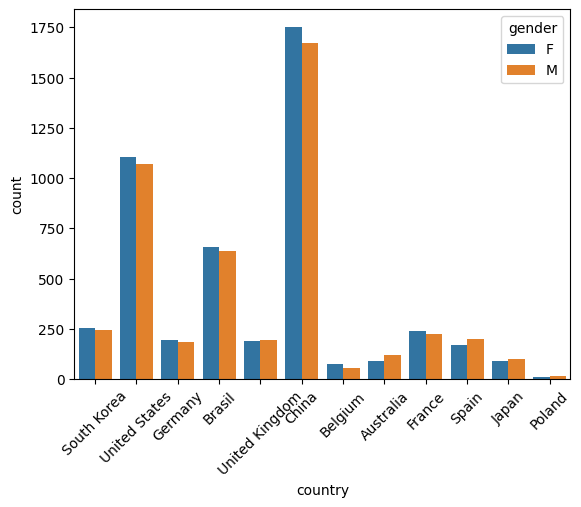

In [179]:
ax = sns.countplot(x='country', data=final_order, hue='gender')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='gender', ylabel='age'>

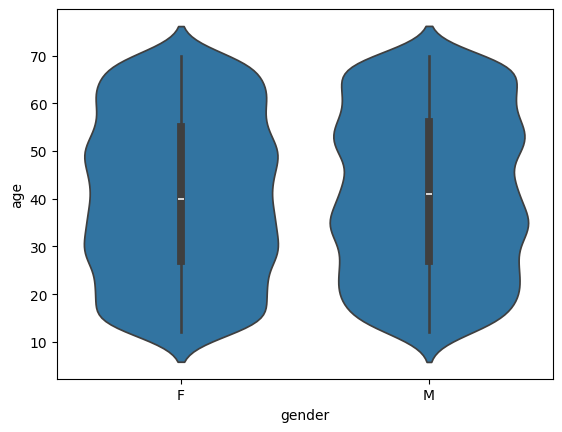

In [182]:
sns.violinplot(x='gender', y='age', data=final_order)

<Axes: xlabel='traffic_source', ylabel='count'>

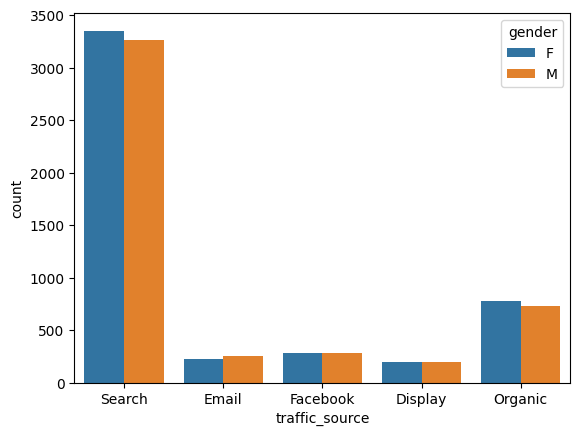

In [184]:
sns.countplot(x='traffic_source', data=final_order, hue='gender')

<Axes: xlabel='traffic_source', ylabel='age'>

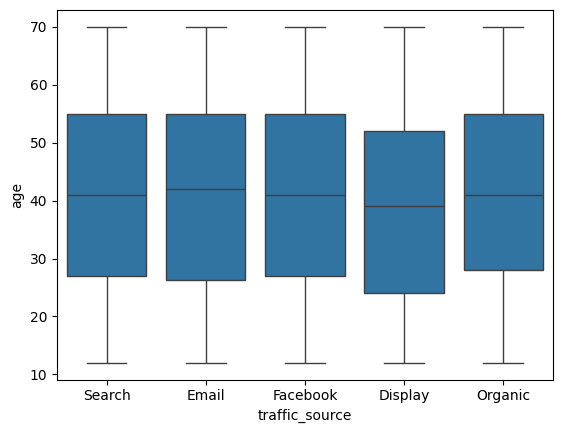

In [185]:
sns.boxplot(x='traffic_source', y='age', data=final_order)

<Axes: xlabel='age', ylabel='cost'>

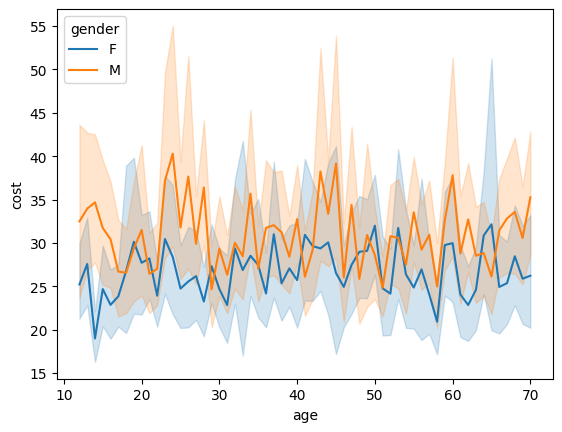

In [189]:
sns.lineplot(x='age', y='cost', data=final_order, hue='gender', )

<Axes: xlabel='age', ylabel='sale_price'>

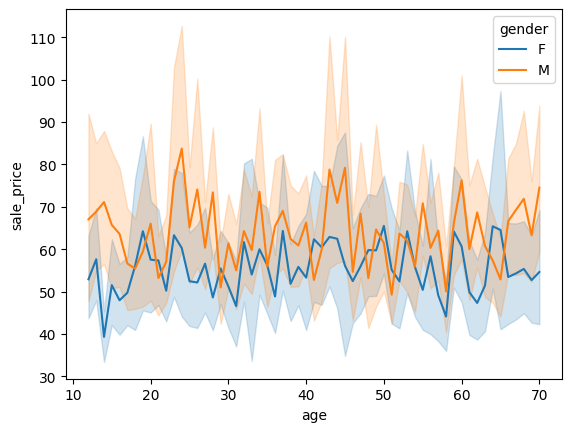

In [190]:
sns.lineplot(x='age', y='sale_price', data=final_order, hue='gender', )

<Axes: xlabel='status', ylabel='count'>

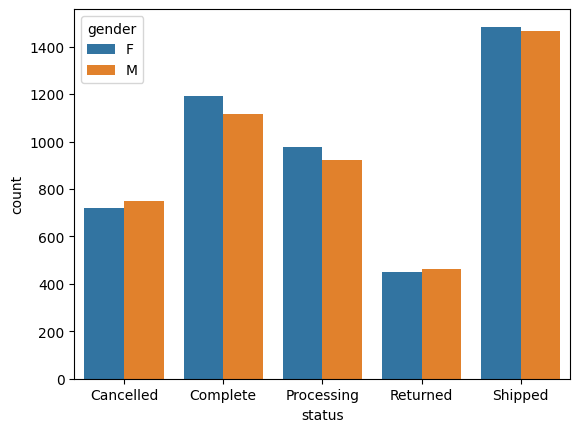

In [191]:
sns.countplot(x='status', data=final_order, hue='gender')

<Axes: xlabel='status', ylabel='age'>

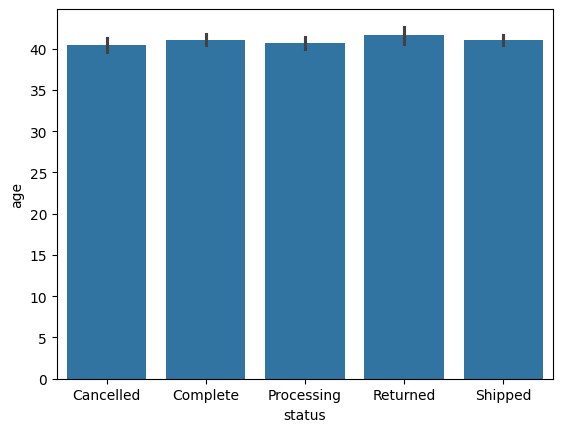

In [192]:
sns.barplot(x='status', y='age', data=final_order)

In [219]:
final_order.head(2)

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,num_of_item,age,gender,state,country,traffic_source,user_geom,cost,category,department,distribution_center_id,name,distribution_center_geom
0,83423,57469,46209,14159,225145,Cancelled,2025-06-09 10:05:31+00:00,NaT,NaT,NaT,0.49,3,23,F,Gyeonggi-do,South Korea,Search,POINT(126.8531488 37.31049948),0.17738,Accessories,Women,1,Memphis TN,POINT(-89.9711 35.1174)
1,177565,122267,97924,28589,478804,Cancelled,2025-06-11 05:00:13+00:00,NaT,NaT,NaT,2.95,1,51,M,Texas,United States,Search,POINT(-96.58105934 32.85831762),1.29505,Accessories,Men,2,Chicago IL,POINT(-87.6847 41.8369)


([0, 1], [Text(0, 0, 'F'), Text(1, 0, 'M')])

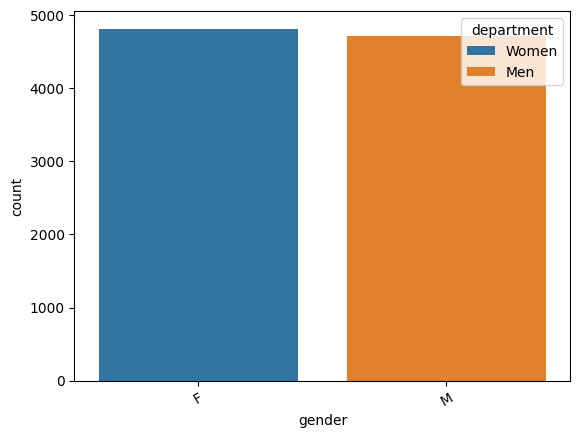

In [224]:
sns.countplot(x='gender', data=final_order, hue='department')
plt.xticks(rotation=30)

In [227]:
final_order.groupby(['gender']).size()

gender
F    4818
M    4717
dtype: int64

In [226]:
final_order.groupby(['category', 'gender']).size()

category                       gender
Accessories                    F         225
                               M         303
Active                         F         200
                               M         259
Blazers & Jackets              F         164
Clothing Sets                  F          11
Dresses                        F         266
Fashion Hoodies & Sweatshirts  F         292
                               M         334
Intimates                      F         743
Jeans                          F         258
                               M         405
Jumpsuits & Rompers            F          61
Leggings                       F         169
Maternity                      F         263
Outerwear & Coats              F         198
                               M         293
Pants                          M         380
Pants & Capris                 F         182
Plus                           F         202
Shorts                         F         246
                 

In [228]:
final_order.groupby(['category', 'department']).size()

category                       department
Accessories                    Men           303
                               Women         225
Active                         Men           259
                               Women         200
Blazers & Jackets              Women         164
Clothing Sets                  Women          11
Dresses                        Women         266
Fashion Hoodies & Sweatshirts  Men           334
                               Women         292
Intimates                      Women         743
Jeans                          Men           405
                               Women         258
Jumpsuits & Rompers            Women          61
Leggings                       Women         169
Maternity                      Women         263
Outerwear & Coats              Men           293
                               Women         198
Pants                          Men           380
Pants & Capris                 Women         182
Plus                       

In [229]:
final_order.groupby('department')['cost'].mean()

department
Men      30.978576
Women    26.658038
Name: cost, dtype: float64

In [230]:
final_order.groupby('gender')['cost'].mean()

gender
F    26.658038
M    30.978576
Name: cost, dtype: float64

In [232]:
final_order.groupby('gender').agg(total_order)

gender
F    8947
M    8522
Name: num_of_item, dtype: Int64